# Plot

In [1]:
# HIDE CODE


import os
import sys
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from scipy.ndimage import gaussian_filter
from IPython.display import display, IFrame, HTML

# code
sys.path.insert(0, '/home/hadi/Desktop/_Ca-fMRI')
from figures.fighelper import *
from analysis.final import *
from utils.render import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from tqdm.notebook import tqdm
%matplotlib inline
set_style()

In [2]:
path = '/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3'
lookup = np.load(pjoin(path, 'roi_lookup.npy'), allow_pickle=True).item()

In [3]:
topview = np.load('/home/hadi/Desktop/topview.npy')
topview_mask = np.load('/home/hadi/Desktop/topview_mask.npy')

## Ca example

In [46]:
path = '/home/hadi/Downloads/ca_average'
x = np.load(pjoin(path, 'sub_SLC06_ca_stim.npy'))
x.shape

(540, 110)

In [47]:
len(lookup['ca2'])

540

In [48]:
mice = Mice(512)

In [49]:
bs = Base(mice, mode='ca2')

### Project

In [50]:
proj = bs.project_vec(x.T, layer=0, add_disjoint=False)
list(proj), proj['top'].shape

(['top', 'flat'], (110, 1320, 1140))

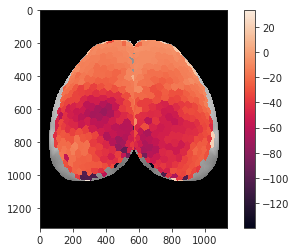

In [52]:
plt.imshow(topview, cmap='Greys_r')
plt.imshow(mwh(topview_mask == 0, proj['top'][40]))
plt.colorbar();

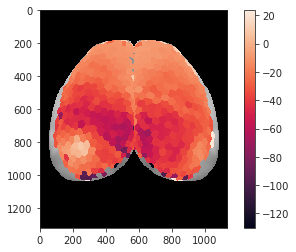

In [53]:
plt.imshow(topview, cmap='Greys_r')
plt.imshow(mwh(topview_mask == 0, proj['top'][10]))
plt.colorbar();

## BOLD example

In [59]:
path = '/home/hadi/Downloads/bold average'
x = np.load(pjoin(path, 'sub_SLC06_bold_rest.npy'))
x.shape

(3068, 11)

In [60]:
subset_idxs = mice.get_subset_idxs('surface')
len(subset_idxs)

540

In [61]:
x = x[subset_idxs]
x.shape

(540, 11)

In [62]:
proj = bs.project_vec(x.T, layer=0, add_disjoint=False)
list(proj), proj['top'].shape

(['top', 'flat'], (11, 1320, 1140))

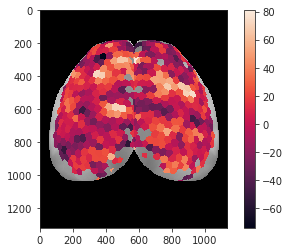

In [63]:
plt.imshow(topview, cmap='Greys_r')
plt.imshow(mwh(topview_mask == 0, proj['top'][4]))
plt.colorbar();

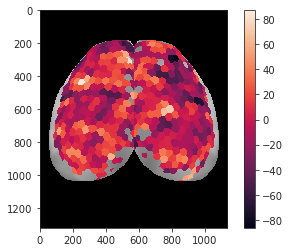